In [40]:
import pandas as pd
import numpy as np
df_movie = pd.read_csv("movies.csv")
df_user_ratings = pd.read_csv("ratings.csv")

In [41]:
df_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [42]:
df_user_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [43]:
df_movie.shape

(9742, 3)

In [44]:
df_user_ratings.shape

(100836, 4)

In [45]:
df_movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [46]:
df_user_ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [47]:
#merge between users rating to movies table. (it's also drop movies without votes)
df = df_user_ratings.merge(df_movie)

In [48]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [49]:
df['movieId'].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: movieId, Length: 9724, dtype: int64

In [50]:
#drop movies with less than 10 vote
df=df.groupby('movieId').filter(lambda x : len(x)>10)

In [51]:
df['movieId'].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
3783       11
104913     11
4149       11
49274      11
7324       11
Name: movieId, Length: 2121, dtype: int64

In [52]:
df['userId'].value_counts()

414    1569
599    1327
68     1064
474    1037
448     975
       ... 
598      14
499      14
324      13
578      10
175       7
Name: userId, Length: 610, dtype: int64

In [53]:
#drop users with less than 10 watch
df=df.groupby('userId').filter(lambda x : len(x)>10)

In [54]:
df['userId'].value_counts()

414    1569
599    1327
68     1064
474    1037
448     975
       ... 
544      15
320      15
598      14
499      14
324      13
Name: userId, Length: 608, dtype: int64

In [55]:
df=df[['userId', 'title', 'rating']]

In [56]:
df.head()

,userId,title,rating
0,1,Toy Story (1995),4.0
1,5,Toy Story (1995),4.0
2,7,Toy Story (1995),4.5
3,15,Toy Story (1995),2.5
4,17,Toy Story (1995),4.5


In [57]:
#rating matrix - Each row would contain the ratings given by a user, and each column would contain the ratings received by an item.
df = df.pivot_table('rating', ['userId'], 'title')
df.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df =df.fillna(0) # fill null values with 0

In [59]:
df = np.transpose(df)

In [60]:
df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
"10,000 BC (2008)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0
Zootopia (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0


# Test the algotirhem

In [61]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(df.values)
distances, indices = knn.kneighbors(df.values, n_neighbors=3)

In [62]:
indices

array([[   0,  168, 1257],
       [   1, 1706, 1998],
       [   2, 1358, 2089],
       ...,
       [2118, 1726,  113],
       [2119,  529, 1602],
       [2120, 1257,  742]], dtype=int64)

In [63]:
distances

array([[0.        , 0.48701796, 0.48833716],
       [0.        , 0.47141938, 0.51707643],
       [0.        , 0.4649923 , 0.48093295],
       ...,
       [0.        , 0.57825085, 0.59792766],
       [0.        , 0.32442767, 0.42235875],
       [0.        , 0.46429966, 0.48672079]])

In [64]:
# get the index for 'movie_0'
index_for_movie = 0

In [65]:

# find the indices for the similar movies
sim_movies = indices[index_for_movie].tolist()
# distances between 'movie_0' and the similar movies
movie_distances = distances[index_for_movie].tolist()
# the position of 'movie_0' in the list sim_movies
id_movie = sim_movies.index(index_for_movie)
# remove 'movie_0' from the list sim_movies
sim_movies.remove(index_for_movie)
# remove 'movie_0' from the list movie_distances
movie_distances.pop(id_movie)
print('The Nearest Movies to movie_0:', sim_movies)
print('The Distance from movie_0:', movie_distances)

The Nearest Movies to movie_0: [168, 1257]
The Distance from movie_0: [0.48701795802192394, 0.48833716302858743]


# Build function to recommend movies to users

In [66]:
def recommendation_table(df,user_index):
    # test the algorithem, how it predicts on known user rating.
    # copy df
    df1 = df.copy()

    # find the nearest neighbors using NearestNeighbors(n_neighbors=100)
    number_neighbors = 100
    knn = NearestNeighbors(metric='cosine', algorithm='brute')
    knn.fit(df.values)
    distances, indices = knn.kneighbors(df.values, n_neighbors=number_neighbors)

    # convert user_name to user_index
    user_index = df.columns.tolist().index(user_index)
    # t: movie_title, m: the row number of t in df
    for m,t in list(enumerate(df.index)):
         # find movies without ratings by user
        if df.iloc[m, user_index] == 0:
            sim_movies = indices[m].tolist()
            movie_distances = distances[m].tolist()
            #  in case number_neighbors = 3 : indices[3] = [3 6 7]. The movie itself is in the first place.
            # In this case, we take off 3 from the list. Then, indices[3] == [6 7] to have the nearest NEIGHBORS in the list. 
            if m in sim_movies:
                id_movie = sim_movies.index(m)
                sim_movies.remove(m)
                movie_distances.pop(id_movie) 
            # However, if the percentage of ratings in the dataset is very low, there are too many 0s in the dataset. 
            # Some movies have all 0 ratings and the movies with all 0s are considered the same movies by NearestNeighbors(). 
            # Then,even the movie itself cannot be included in the indices. 
            # For example, indices[3] = [2 4 7] is possible if movie_2, movie_3, movie_4, and movie_7 have all 0s for their ratings.
            # In that case, we take off the farthest movie in the list. Therefore, 7 is taken off from the list, then indices[3] == [2 4].
            else:
                sim_movies = sim_movies[:n_neighbors-1]
                movie_distances = movie_distances[:n_neighbors-1]
            # movie_similarty = 1 - movie_distance
        else:
            continue
            
        movie_similarity = [1-x for x in movie_distances]
        movie_similarity_copy = movie_similarity.copy()
        nominator = 0
        for s in range(0, len(movie_similarity)):
        # check if the rating of a similar movie is zero
            if df.iloc[sim_movies[s], user_index] == 0:
                 # if the rating is zero, ignore the rating and the similarity in calculating the predicted rating
                if len(movie_similarity_copy) == (number_neighbors - 1):
                    movie_similarity_copy.pop(s)
                else:
                    movie_similarity_copy.pop(s-(len(movie_similarity)-len(movie_similarity_copy)))

                 # if the rating is not zero, use the rating and similarity in the calculation
            else:
                nominator = nominator + movie_similarity[s]*df.iloc[sim_movies[s],user_index]
         # check if the number of the ratings with non-zero is positive
        if len(movie_similarity_copy) > 0:
             # check if the sum of the ratings of the similar movies is positive.
            if sum(movie_similarity_copy) > 0:
                predicted_r = nominator/sum(movie_similarity_copy)
                  # Even if there are some movies for which the ratings are positive, some movies have zero similarity even though they are selected as similar movies.
                # in this case, the predicted rating becomes zero as well  
            else:
                predicted_r = 0
         # if all the of the similar movies are zero, then predicted rating should be zero
        else:
            predicted_r = 0
      # place the predicted rating into the copy of the original dataset
        df1.iloc[m,user_index] = predicted_r
    return df1

In [67]:
### this function recommend number of movies for the user it gets ###
def recommend_movies(user, num_recommended_movies):
    print('The list of the Movies {} Has Watched \n'.format(user))
    df1 = recommendation_table(df,user)
    # get all the movies user has watched
    for m in df[df[user] > 0][user].index.tolist():
        print(m)
    print('\n')
    recommended_movies = []
    # for every movie user hasnt watched, get recommendation
    for m in df[df[user] == 0].index.tolist():
        index_df = df.index.tolist().index(m)
        predicted_rating = df1.iloc[index_df, df1.columns.tolist().index(user)]
        recommended_movies.append((m, predicted_rating))
        print(predicted_rating)
     # sort the predicted rating 
    sorted_rm = sorted(recommended_movies, key=lambda x:x[1], reverse=True)
    print('The list of the Recommended Movies \n')
    rank = 1
    # print recommended movies for user
    for recommended_movie in sorted_rm[:num_recommended_movies]:
        print('{}: {} - predicted rating:{}'.format(rank, recommended_movie[0], recommended_movie[1]))
        rank = rank + 1

In [98]:
import random
### this function is used to test the recommendation system ###

def recommender (user):
    y_true = []
    y_pred = []
    movie = []
    #random_movie = []
    random_movie_rating = []
    movie_list = df[df[user] > 0].index.tolist() # get list of all movies the user has watched
    random_movie = random.sample(movie_list, 5)
    for j in range (0,5):
        #random_movie.append(random.choice(movie_list))  #get random, movie from lsit
        random_movie_rating.append(df[user][random_movie[j]]) 
        y_true.append(df[user][random_movie[j]])
        if j == 0:
            print("\n Real Movies Rating \n ----------------")
        print("{}{}".format(random_movie[j],random_movie_rating[j]))
    for i in random_movie:
        # set the rating of the movies that chosen randomly to 0
        df[user][random_movie] = 0
    
    df1 = recommendation_table(df,user) # get prediction from recommendation system on the randomly selected movies
    for i in range(0,5):
        # set back the rating of the movies that chosen randomly to original value
        df[user][random_movie[i]] = random_movie_rating[i]
    for idx,i in enumerate(random_movie):
        if idx == 0:
            print("\n Predicted Movies Rating \n-------------------\n")
        print( i + "  {}".format(df1[user][i]) )
        movie.append(i)
        y_pred.append(df1[user][i])
    return (y_true,y_pred,movie)#return true rating and predicted rating

In [99]:
# run recommender function on first 100 users with 5 movies for each user
y_true = []
y_pred = []
movie = []
for i in range(1,100):
    y =recommender(i)
    for j in range(0,5):
        y_true.append(y[0][j])
        y_pred.append(y[1][j])
        movie.append(y[2][j])


 Real Movies Rating 
 ----------------
Braveheart (1995)4.0
James and the Giant Peach (1996)5.0
Usual Suspects, The (1995)5.0
Teenage Mutant Ninja Turtles III (1993)4.0
Office Space (1999)5.0

 Predicted Movies Rating 
-------------------

Braveheart (1995)  4.301138892274813
James and the Giant Peach (1996)  4.227019706696732
Usual Suspects, The (1995)  4.492847409762929
Teenage Mutant Ninja Turtles III (1993)  4.1964934870953
Office Space (1999)  4.6435576935774385

 Real Movies Rating 
 ----------------
Gladiator (2000)4.0
Talladega Nights: The Ballad of Ricky Bobby (2006)4.0
Django Unchained (2012)3.5
Dark Knight Rises, The (2012)3.5
Warrior (2011)5.0

 Predicted Movies Rating 
-------------------

Gladiator (2000)  4.038093374360948
Talladega Nights: The Ballad of Ricky Bobby (2006)  0.0
Django Unchained (2012)  4.073217225450238
Dark Knight Rises, The (2012)  4.076269324981587
Warrior (2011)  4.518136390309406

 Real Movies Rating 
 ----------------
Conan the Barbarian (1982)4.5


 Predicted Movies Rating 
-------------------

Lady and the Tramp (1955)  4.194971142895214
E.T. the Extra-Terrestrial (1982)  3.9817526718691374
Zoolander (2001)  3.1222141488604054
Royal Tenenbaums, The (2001)  3.562286136200075
Lara Croft: Tomb Raider (2001)  2.8881355270737257

 Real Movies Rating 
 ----------------
Harry Potter and the Deathly Hallows: Part 2 (2011)4.0
The Interview (2014)0.5
Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002)4.5
John Wick (2014)3.5
Look Who's Talking (1989)2.5

 Predicted Movies Rating 
-------------------

Harry Potter and the Deathly Hallows: Part 2 (2011)  3.4964801861494106
The Interview (2014)  3.447160232046417
Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002)  3.6373196061666127
John Wick (2014)  3.5401580533741837
Look Who's Talking (1989)  3.960627284297048

 Real Movies Rating 
 ----------------
Million Dollar Baby (2004)2.0
Broken Flowers (2005)3.0
Monsters, Inc. (2001)3.5
Lord of War (2005)2.5
French Connection, The (1971)4.5

 Pre


 Predicted Movies Rating 
-------------------

I.Q. (1994)  3.31304804732456
Brady Bunch Movie, The (1995)  3.0568640850839057
Mask, The (1994)  3.3176007909930876
Cliffhanger (1993)  3.226227970837577
Legends of the Fall (1994)  3.352847961173491

 Real Movies Rating 
 ----------------
High Fidelity (2000)5.0
101 Dalmatians (One Hundred and One Dalmatians) (1961)3.0
Texas Chainsaw Massacre, The (1974)3.0
Pinocchio (1940)3.0
Best in Show (2000)5.0

 Predicted Movies Rating 
-------------------

High Fidelity (2000)  4.496939669687701
101 Dalmatians (One Hundred and One Dalmatians) (1961)  2.931068445882701
Texas Chainsaw Massacre, The (1974)  3.685783688905405
Pinocchio (1940)  3.130099531039846
Best in Show (2000)  4.191428763609843

 Real Movies Rating 
 ----------------
I.Q. (1994)4.0
Crow, The (1994)3.0
Nobody's Fool (1994)5.0
Mary Shelley's Frankenstein (Frankenstein) (1994)1.0
Desperado (1995)5.0

 Predicted Movies Rating 
-------------------

I.Q. (1994)  3.5609678597731205
Cro


 Predicted Movies Rating 
-------------------

Apollo 13 (1995)  3.96247418587476
Mission: Impossible (1996)  4.0427881803071575
Miracle on 34th Street (1994)  3.8676980058896495
What's Eating Gilbert Grape (1993)  4.0248217943004585
Aristocats, The (1970)  3.9378435793595075

 Real Movies Rating 
 ----------------
Lord of the Flies (1963)4.0
Rebecca (1940)5.0
Richard III (1995)5.0
Full Metal Jacket (1987)5.0
Witness (1985)5.0

 Predicted Movies Rating 
-------------------

Lord of the Flies (1963)  3.893660137411258
Rebecca (1940)  4.808392838827093
Richard III (1995)  4.386274653048783
Full Metal Jacket (1987)  4.210607146736865
Witness (1985)  4.745294468337134

 Real Movies Rating 
 ----------------
Glory (1989)4.0
Dark Knight, The (2008)5.0
Do the Right Thing (1989)4.0
Ransom (1996)3.0
Time to Kill, A (1996)4.0

 Predicted Movies Rating 
-------------------

Glory (1989)  5.0
Dark Knight, The (2008)  4.491024954023359
Do the Right Thing (1989)  4.0
Ransom (1996)  0.0
Time to Kill


 Predicted Movies Rating 
-------------------

Fight Club (1999)  3.5087898897387597
War of the Worlds (2005)  2.8211445771705357
No Country for Old Men (2007)  3.4276187307385726
Monty Python's Life of Brian (1979)  3.4496972881967536
Happiness (1998)  3.009929572118862

 Real Movies Rating 
 ----------------
Memento (2000)2.5
Bourne Ultimatum, The (2007)3.0
Interstellar (2014)4.0
Lord of the Rings: The Fellowship of the Ring, The (2001)5.0
Eternal Sunshine of the Spotless Mind (2004)2.0

 Predicted Movies Rating 
-------------------

Memento (2000)  4.050282738178938
Bourne Ultimatum, The (2007)  4.055013064436847
Interstellar (2014)  4.5097308245046825
Lord of the Rings: The Fellowship of the Ring, The (2001)  4.271159603387301
Eternal Sunshine of the Spotless Mind (2004)  3.767737884983903

 Real Movies Rating 
 ----------------
National Lampoon's Vacation (1983)2.0
What About Bob? (1991)3.0
Hollow Man (2000)2.5
Airplane! (1980)5.0
Die Hard (1988)5.0

 Predicted Movies Rating 
---


 Predicted Movies Rating 
-------------------

Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)  4.577553294123359
Die Hard (1988)  4.489547822326966
Spider-Man (2002)  4.1424852537024766
Time Bandits (1981)  4.5073488378636615
101 Dalmatians (One Hundred and One Dalmatians) (1961)  3.975616213747765

 Real Movies Rating 
 ----------------
L.A. Confidential (1997)5.0
Thelma & Louise (1991)5.0
Godfather: Part II, The (1974)4.0
True Lies (1994)3.0
Mission: Impossible (1996)3.0

 Predicted Movies Rating 
-------------------

L.A. Confidential (1997)  4.405384879037655
Thelma & Louise (1991)  3.8340481638656994
Godfather: Part II, The (1974)  4.366695398205788
True Lies (1994)  4.474462610541843
Mission: Impossible (1996)  4.2603578465991525

 Real Movies Rating 
 ----------------
Lara Croft: Tomb Raider (2001)4.0
Rain Man (1988)2.0
Knight's Tale, A (2001)4.0
Lord of the Rings: The Fellowship of the Ring, The (2001)5.0
Speed (1994)4.0

 Predicted Movies Rating 
-------------------

La

In [100]:
y

([5.0, 5.0, 5.0, 2.0, 5.0],
 [4.132003096188251,
  3.858784257516723,
  4.004878614190182,
  3.916903098249604,
  4.145585423631393],
 ['Batman Forever (1995)',
  'Tommy Boy (1995)',
  'Clear and Present Danger (1994)',
  'Coneheads (1993)',
  "Nobody's Fool (1994)"])

In [101]:
d = {'y_true': y_true, 'y_pred': y_pred,'movie':movie}
df_pred = pd.DataFrame(data=d)

In [106]:
df_pred['random'] = np.random.uniform(0.5, 5, df_pred.shape[0])

In [107]:
df_pred

,y_true,y_pred,movie,random
0,4.0,4.301139,Braveheart (1995),1.693626
1,5.0,4.227020,James and the Giant Peach (1996),0.923569
2,5.0,4.492847,"Usual Suspects, The (1995)",2.292383
3,4.0,4.196493,Teenage Mutant Ninja Turtles III (1993),0.901367
4,5.0,4.643558,Office Space (1999),2.271248
...,...,...,...,...
490,5.0,4.132003,Batman Forever (1995),0.599653
491,5.0,3.858784,Tommy Boy (1995),4.614049
492,5.0,4.004879,Clear and Present Danger (1994),3.158002
493,2.0,3.916903,Coneheads (1993),4.548141


In [108]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("mean_squared_error prediction :\t {}".format(mean_squared_error(y_true, y_pred)))
print("mean_squared_error random :\t {}".format(mean_squared_error(y_true, df_pred['random'])))
print("mean_absolute_error prediction :\t {}".format(mean_absolute_error(y_true, y_pred)))
print("mean_absolute_error random :\t {}".format(mean_absolute_error(y_true, df_pred['random'])))

mean_squared_error prediction :	 1.327059430192362
mean_squared_error random :	 3.9364325721168245
mean_absolute_error prediction :	 0.7948811229126079
mean_absolute_error random :	 1.621194699654777


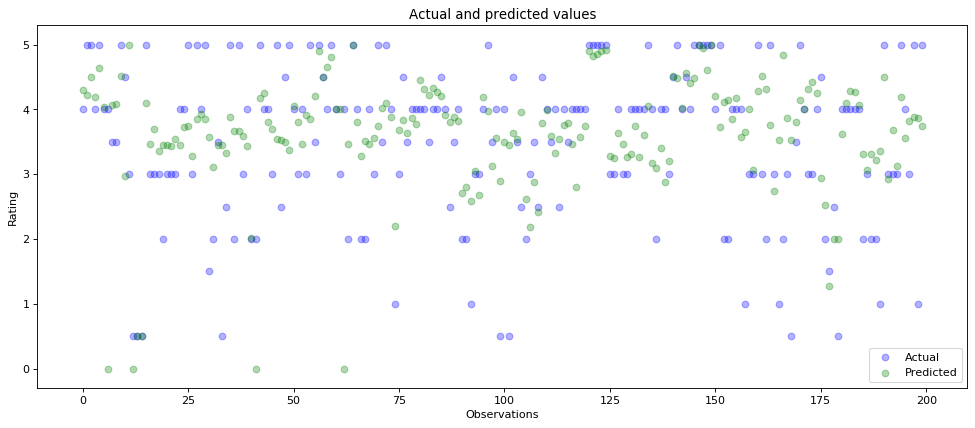

In [105]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(15, 6), dpi=80)

ax.scatter(x = range(0, 200), y=df_pred['y_true'].head(200), c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, 200), y=df_pred['y_pred'].head(200), c = 'green', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Rating')
plt.legend()
plt.show()